In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_moons, make_regression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()
X = iris.data[:,2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=0)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

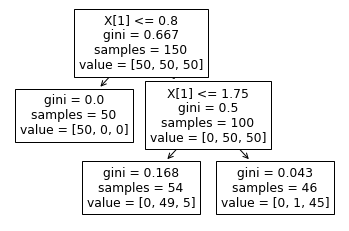

In [4]:
plot_tree(tree_clf)
plt.show()

In [27]:
tree_clf.score(X,y)

0.96

In [28]:
# Verdadero positivo + Falso negativo / total de observaciones
(
    pd.DataFrame({
        "y_observado" : y,
        "y_estimado" : tree_clf.predict(X)
    })
    .pivot_table(index="y_observado", columns="y_estimado", aggfunc="size")
)

y_estimado,0,1,2
y_observado,,,
0,50.0,NaN,NaN
1,NaN,49.0,1.0
2,NaN,5.0,45.0


In [29]:
(50+49+45) / 150

0.96

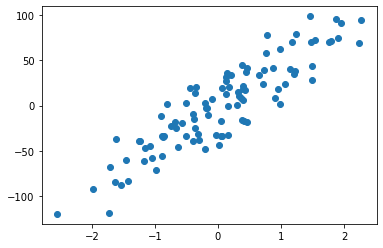

In [47]:
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=0)

plt.scatter(X,y)
plt.show()

In [48]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=0)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [50]:
tree_reg.score(X,y)

0.7791372475214192

MSE = Mean Squared Error

In [53]:
y.mean()

0.9346105109587458

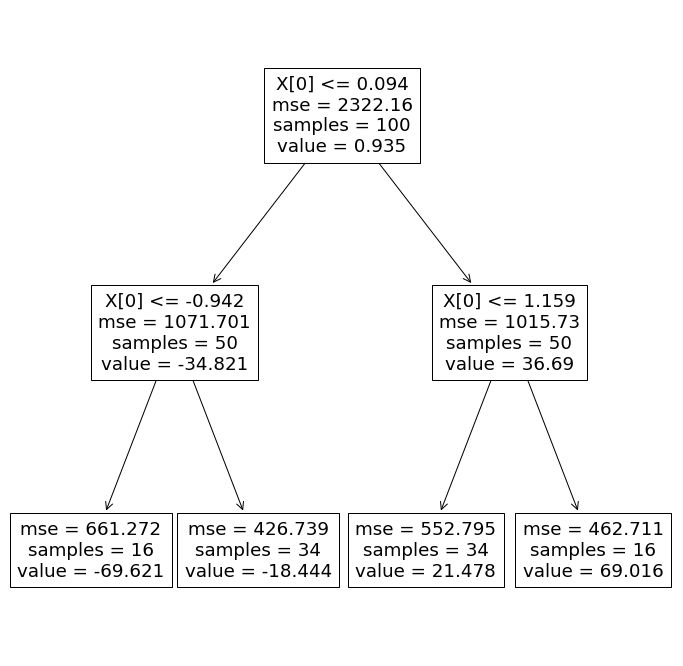

In [51]:
plt.figure(figsize=(12,12))
plot_tree(tree_reg)
plt.show()

In [57]:
tree_reg = DecisionTreeRegressor(max_depth=5, random_state=0)
tree_reg.fit(X,y)
tree_reg.score(X,y)

0.9063370761451995

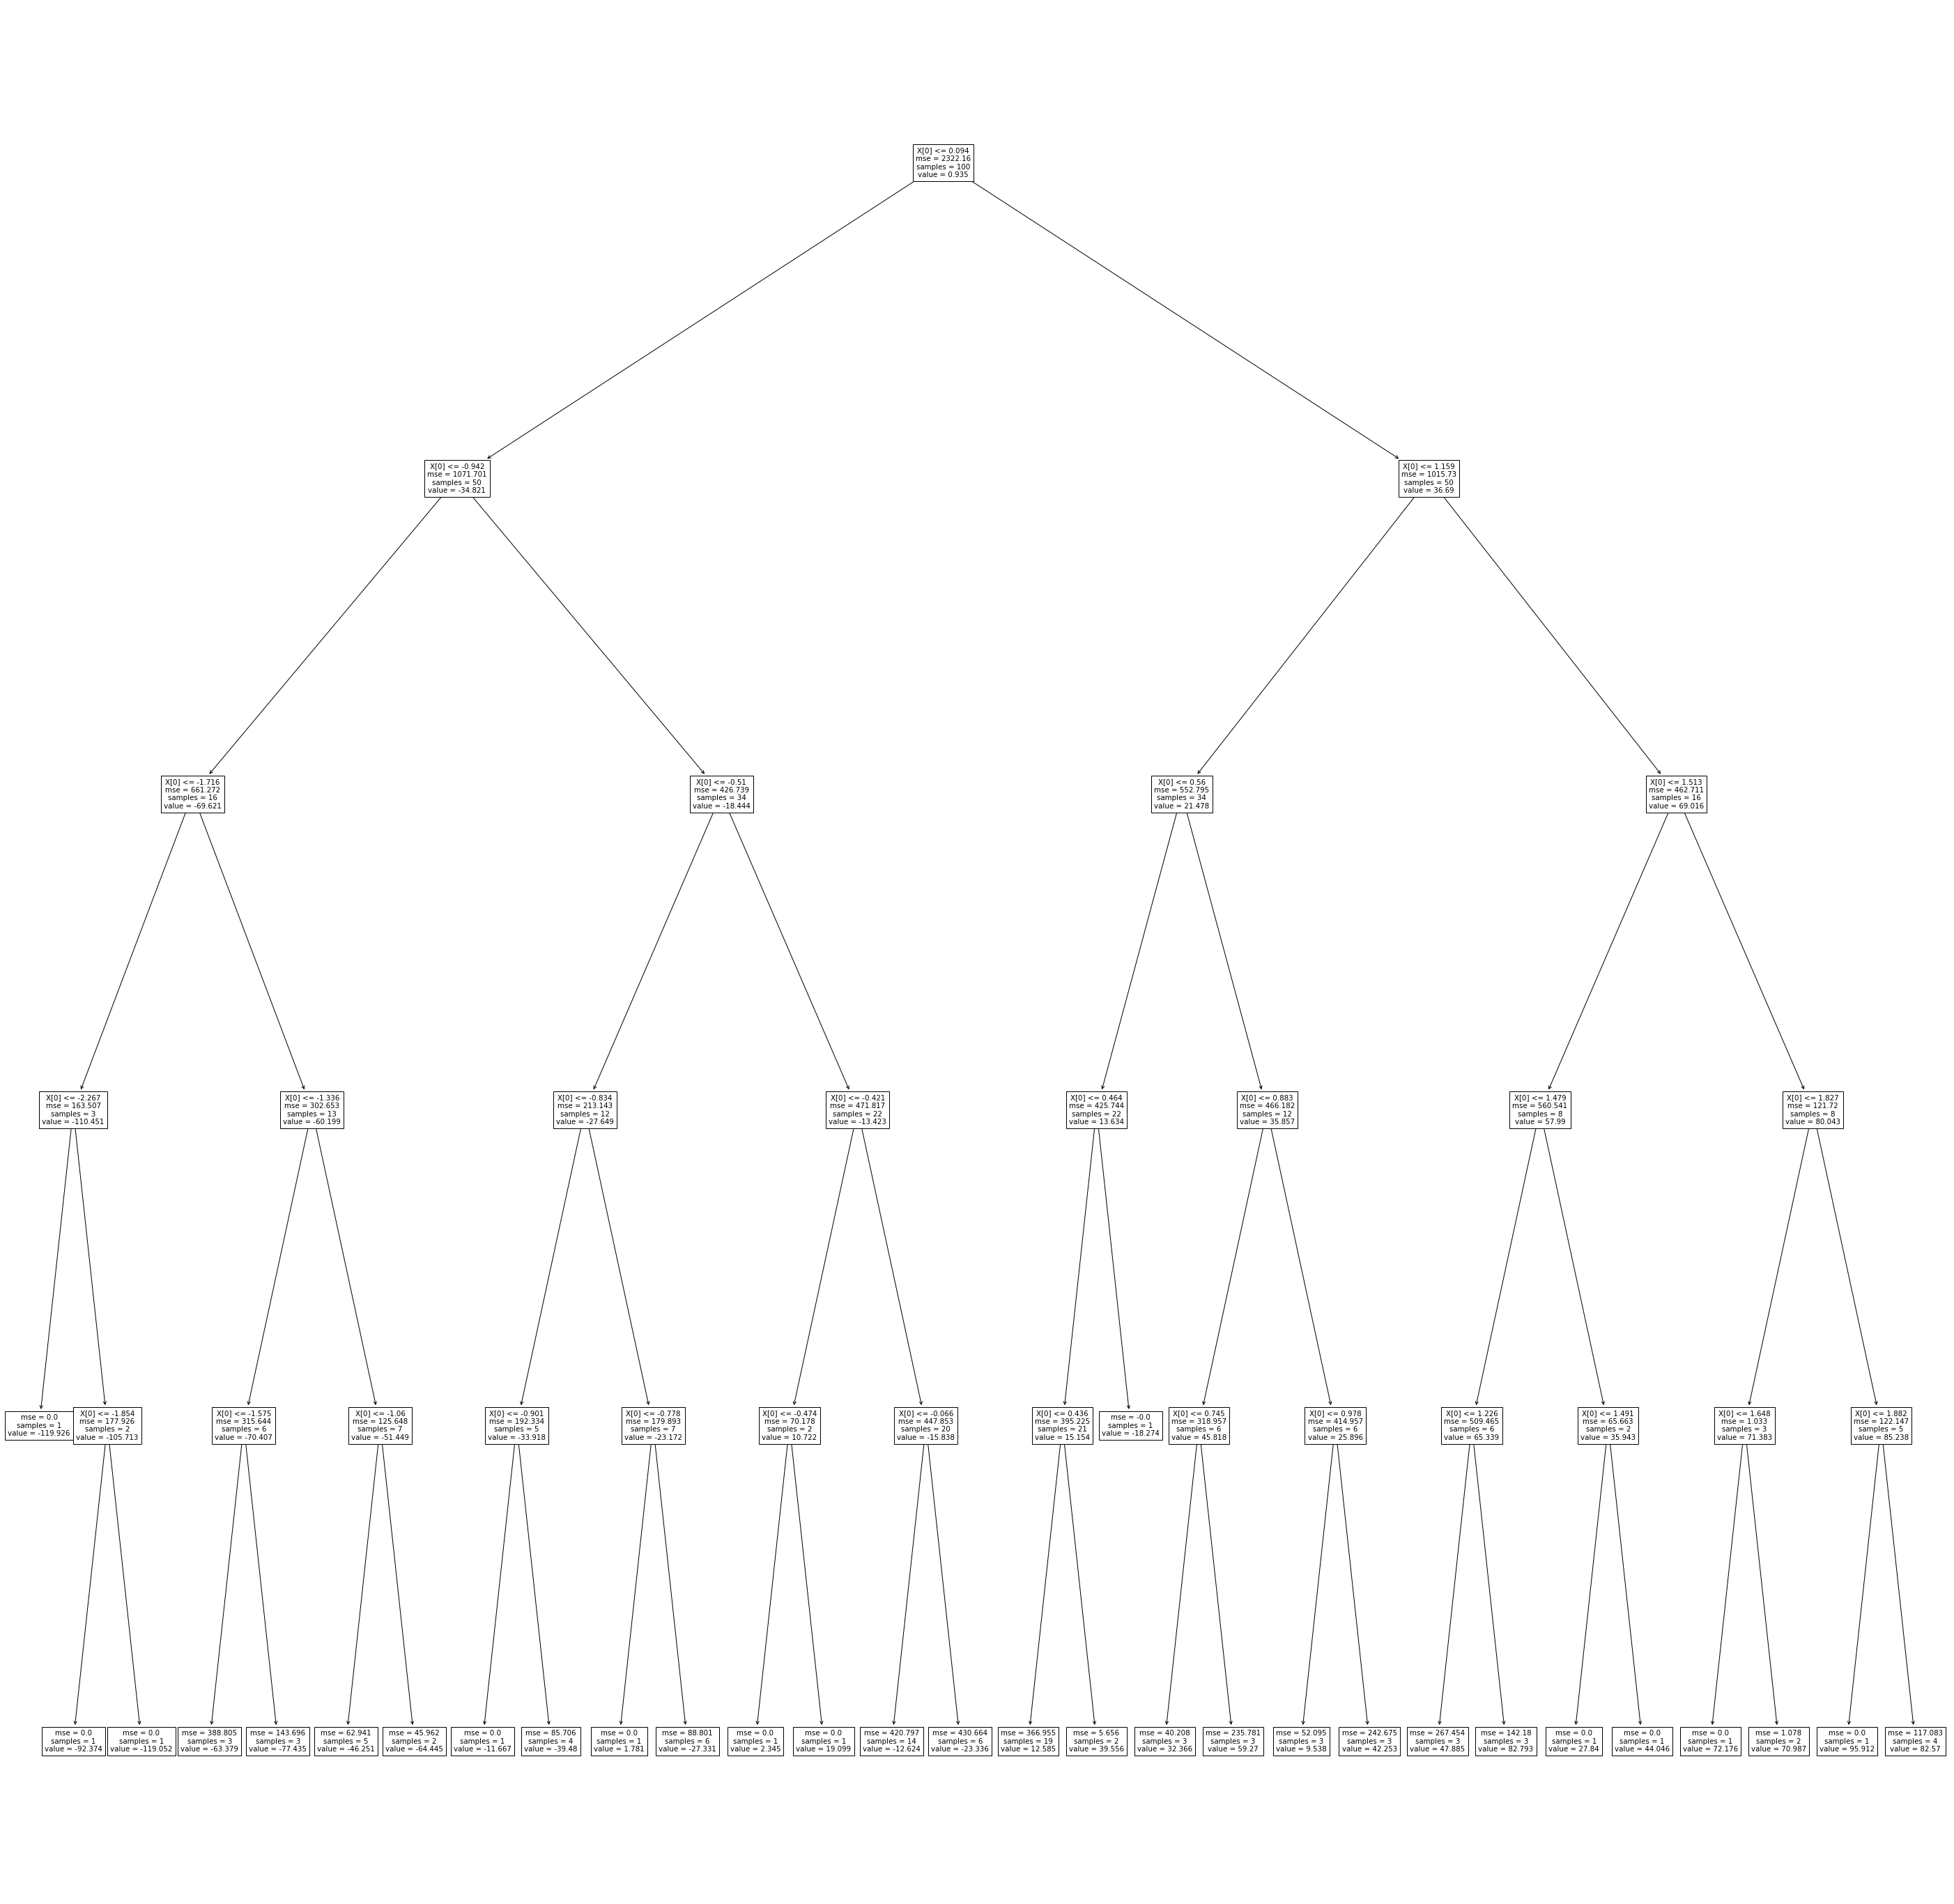

In [58]:
plt.figure(figsize=(50,50))
plot_tree(tree_reg)
plt.show()

# Actividad:

Dataset: "banco_datos_limpios"

En este dataset tenemos a personas que decidieron cerrar su cuenta de banco (Exited). Nuestro objetivo es poder predecir cuando las personas van a cerrar su cuenta. 

Realiza el arbol de decision para ver si podemos predecir la salida de clientes.



In [5]:
datos = pd.read_csv("./data/03Bank_Data.csv")
datos = datos.dropna(how="any")
datos = datos[datos["Balance"]>0]
datos = datos[datos["EstimatedSalary"]<max(datos["EstimatedSalary"])]

In [8]:
X = datos.drop(columns=["Exited","RowNumber","CustomerId","Surname"])
y = datos["Exited"]

In [ ]:
# From long to wide
# X[["Geography"]].head().values.T

In [30]:
X = pd.concat([X, pd.get_dummies(X[["Geography","Gender"]])], axis=1).drop(columns=["Geography","Gender"])

In [44]:
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=0)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [45]:
print(tree_clf.score(X, y))

0.8219714778247924


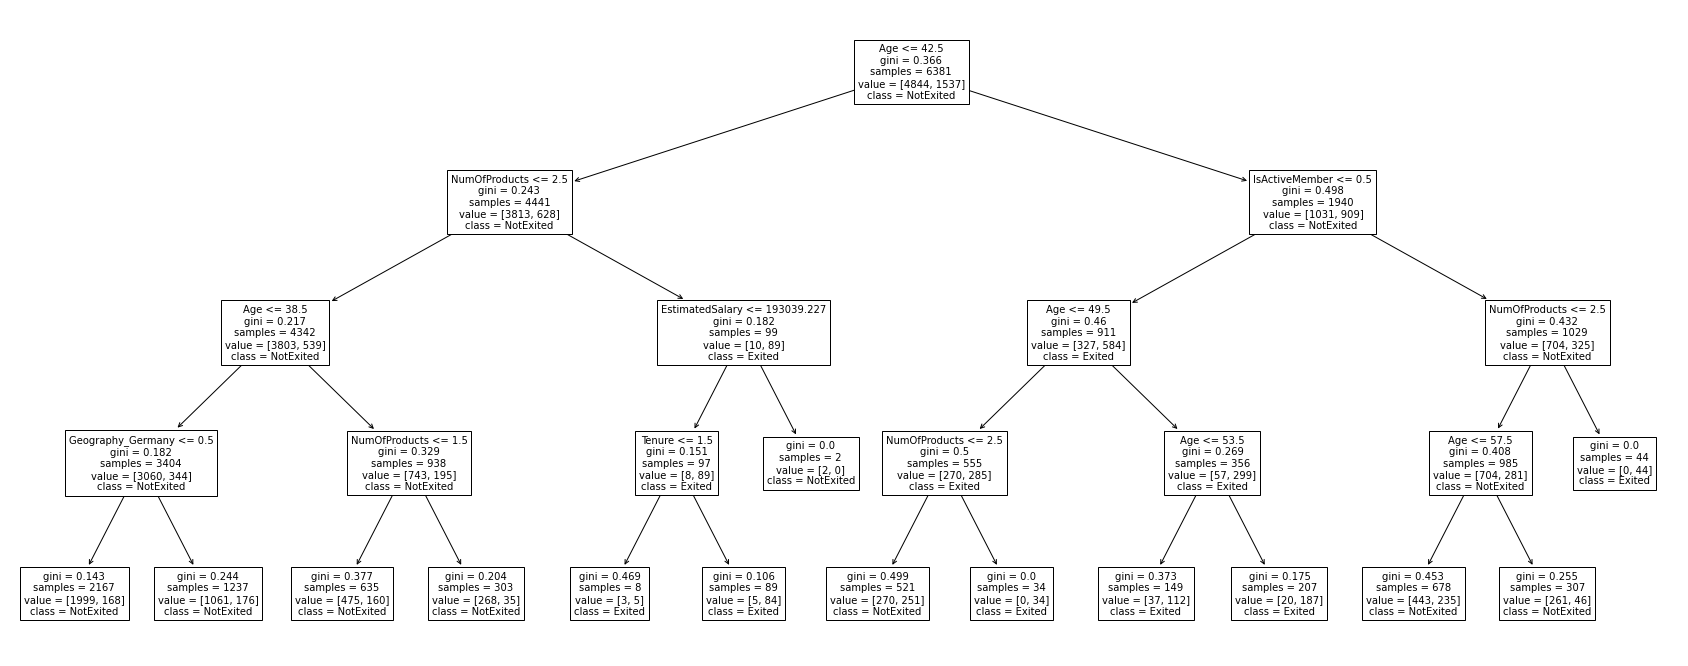

In [46]:
plt.figure(figsize= (30,12))
plot_tree(tree_clf, fontsize=10, feature_names = X.columns, class_names=["NotExited","Exited"])
plt.show()

In [48]:
(
    pd.DataFrame({
        "y_observado" : y,
        "y_estimado" : tree_clf.predict(X)
    })
    .pivot_table(index="y_observado", columns="y_estimado", aggfunc="size")
)

y_estimado,0,1
y_observado,,
0,4779,65
1,1071,466


In [50]:
(4779+466) / len(datos)

0.8219714778247924

# Bosques aleatorios

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [53]:
X, y = make_moons(n_samples=500, noise=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [61]:
df = pd.DataFrame({"x1": X[:,0], "x2":X[:,1], "label":y})

<AxesSubplot:xlabel='x1', ylabel='x2'>

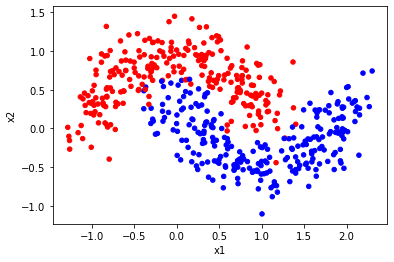

In [65]:
df.plot(
    kind="scatter", 
    x="x1", 
    y="x2", 
    c=["red" if y==0 else "blue" for y in df["label"]]
)

In [66]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, random_state=0)
rnd_clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=500, random_state=0)

In [67]:
rnd_clf.score(X_test, y_test)

0.96

In [69]:
(
    pd.DataFrame(X_test)
    .assign(y = y_test)
    .assign(y_hat = rnd_clf.predict(X_test))
    .pivot_table(index="y",columns="y_hat", aggfunc="size")
)

y_hat,0,1
y,,
0,53,1
1,4,67


# Bosque aleatorio para regresión

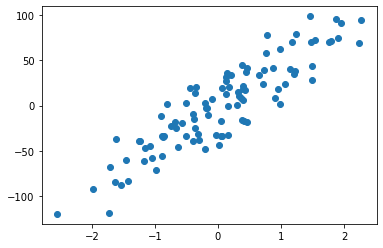

In [70]:
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=0)

plt.scatter(X,y)

In [71]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)


RandomForestRegressor(max_depth=2, random_state=0)

In [72]:
regr.score(X, y)

0.8236109637442826

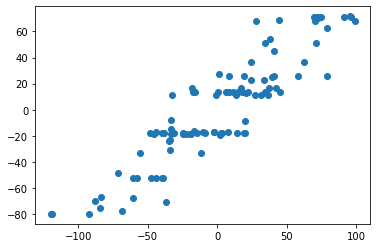

In [73]:
plt.scatter(y, regr.predict(X))

# Estudio de caso práctico

In [76]:
# Estudio de caso práctico
datos = pd.read_csv("./data/03Bank_Data.csv")
datos = datos.dropna(how="any")
datos = datos[datos["Balance"]>0]
datos = datos[datos["EstimatedSalary"]<max(datos["EstimatedSalary"])]

In [77]:
X = datos.drop(columns=["Exited","RowNumber","CustomerId","Surname"])
X = pd.concat([X, pd.get_dummies(X[["Geography","Gender"]])], axis=1).drop(columns=["Geography","Gender"])
y = datos["Exited"]

In [79]:
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=0)
rnd_clf.fit(X, y)
rnd_clf.score(X, y)

1.0

In [81]:
(
    pd.DataFrame(X)
    .assign(y = y)
    .assign(y_hat = rnd_clf.predict(X))
    .pivot_table(index="y",columns="y_hat", aggfunc="size")
)

y_hat,0,1
y,,
0,4844.0,NaN
1,NaN,1537.0


# Forma correcta: train, test, split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=5)

In [83]:
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=0)
rnd_clf.fit(X_train, y_train)
rnd_clf.score(X_test, y_test)

0.850250626566416

In [88]:
(
    pd.DataFrame(X_test)
    .assign(y = y_test)
    .assign(y_hat = rnd_clf.predict(X_test))
    .pivot_table(index="y_hat",columns="y", aggfunc="size")
)

y,0,1
y_hat,,
0,1196,191
1,48,161


In [85]:
from sklearn.metrics import classification_report

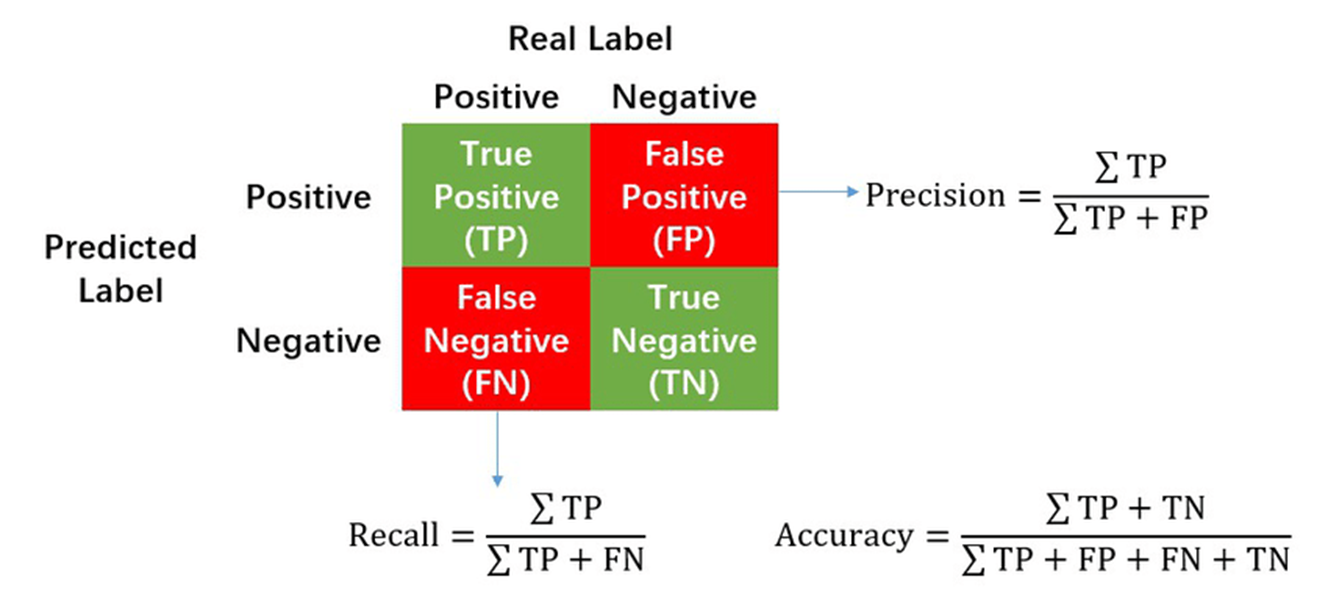

### Precision 
 * Qué porcentaje de las predicciones fueron correctas ? 
 * Precision = TP/ (TP + FP)
 
### Recall
 * Qué porcentaje de los casos positivos pudimos predecir?
 * Tp / (TP + FN )
 
### F1 Score
 * Que porcentaje de las predicciones positivas es correcto? 
 * F1 = 2*(Recall * Precision) / (Recall + Precision)

In [87]:
print(classification_report(y_test, rnd_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1244
           1       0.77      0.46      0.57       352

    accuracy                           0.85      1596
   macro avg       0.82      0.71      0.74      1596
weighted avg       0.84      0.85      0.84      1596



In [91]:
datos["Exited"].value_counts()

0    4844
1    1537
Name: Exited, dtype: int64

In [93]:
# Sorteo de ganadores...
index_NoExited = datos.query("Exited==0").sample(1537,random_state=0).index.to_list()
index_Exited   = datos.query("Exited==1").index.to_list()

In [97]:
datos = datos[datos.index.isin(index_NoExited + index_Exited)]

In [99]:
datos["Exited"].value_counts()

0    1537
1    1537
Name: Exited, dtype: int64

<AxesSubplot:>

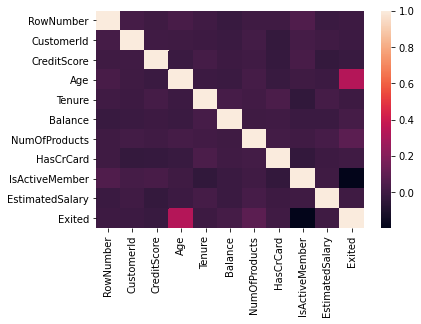

In [100]:
import seaborn as sns  # to plot the heat maps
sns.heatmap(datos.corr())

In [101]:
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

In [102]:
X = datos[["Age","NumOfProducts"]]
y = datos["Exited"]


scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(X)) #scaling the data
print(scaled_data.head())

pca = PCA(0.80)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca)
data_pca.head()

          0         1
0  0.067919  2.406524
1  0.162434 -0.619102
2  0.256949  0.893711
3 -1.160773  3.919337
4  1.580156 -0.619102


,0,1
0,1.749695,-1.653643
1,-0.322913,0.552629
2,0.813639,-0.450259
3,1.950599,-3.592180
4,0.679568,1.555110


In [104]:
X_train, X_test, y_train, y_test = train_test_split(data_pca,y, random_state=0)

forest = RandomForestClassifier(n_estimators=1000)
forest.fit(X_train, y_train)
print(forest.score(X_test, y_test))

0.7113133940182055


In [106]:
print(classification_report(y_test, forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73       399
           1       0.71      0.68      0.69       370

    accuracy                           0.71       769
   macro avg       0.71      0.71      0.71       769
weighted avg       0.71      0.71      0.71       769

